In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy

In [2]:
def AlexNet(X_train, y_train, **kwargs):
    
    model = Sequential([
        Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(384, 512, 3)), # L1
        MaxPooling2D(pool_size=(3,3), strides=(2,2)), # L2
        Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu'), # L3
        MaxPooling2D(pool_size=(3,3), strides=(2,2)), # L4
        Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu'), # L5
        Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu'), # L6
        Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu'), # L7
        MaxPooling2D(pool_size=(3,3), strides=(2,2)), # L8
        Flatten(),
        Dense(4096, activation='relu'), # L9
        Dropout(0.5),
        Dense(4096, activation='relu'), # L10
        Dropout(0.5),
        Dense(3, activation='softmax')
    ])
    
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-5), metrics=['accuracy'])
    history = model.fit(X_train, y_train, **kwargs)
    return model, history

In [3]:
X, y = [], []
folder = 'new-house-resized-dataset'
folder_list = os.listdir(folder)
for file in folder_list:
    print('.',end='')
    category = file.split('_')[0]
    if category == 'recycle':
        y.append([1,0,0])
    elif category == 'trash':
        y.append([0,1,0])
    elif category == 'compost':
        y.append([0,0,1])
    else:
        raise Exception(f'Invalid Waste Catgory: {category}')
    img = Image.open(f'{folder}/{file}')
    arr = np.array(img)
    X.append(arr)

print()
print('Datapoints:', len(y))
X, y = np.array(X), np.array(y)
print('Recycle/Trash/Compost:', np.sum(y, axis=0))
print('done')

................................................................................................................................................................................................................................................................................................................................................................
Datapoints: 352
Recycle/Trash/Compost: [117 118 117]
done


In [4]:
SPLIT = 3
TEST_IDX = [271, 318, 309, 108, 110, 70, 256, 331, 111, 224, 3, 55, 114, 117, 164, 295, 254, 149, 221, 48, 192, 316, 195, 167, 307, 66, 165, 10, 152, 265, 338, 76, 99, 201, 151, 162, 311, 169, 253, 29, 322, 32, 61, 74, 52, 157, 91, 255, 187, 136, 314, 266, 325, 269, 332, 185, 9, 351, 250, 22, 347, 172, 260, 73, 321, 133, 299, 220, 18, 98]

def train_test_split(X, y, test_idx=None, test_size=0.2):
    ''' Split input data X and labels y into training and testing arrays '''
    n_list = list(range(len(y)))
    if test_idx is None:
        print('\n -- Performing NEW train-test split -- \n')
        test_idx = np.random.choice(n_list, replace=False, size=int(test_size*len(y)))
    else:
        test_idx = np.array(test_idx)
    train_idx = np.array([i for i in n_list if i not in test_idx])
    X_train = X[train_idx,:]
    X_test = X[test_idx,:]
    y_train = y[train_idx]
    y_test = y[test_idx]
    return X_train, y_train, X_test, y_test, test_idx

X_train, y_train, X_test, y_test, test_idx = train_test_split(X, y, TEST_IDX)
print(list(test_idx))

[271, 318, 309, 108, 110, 70, 256, 331, 111, 224, 3, 55, 114, 117, 164, 295, 254, 149, 221, 48, 192, 316, 195, 167, 307, 66, 165, 10, 152, 265, 338, 76, 99, 201, 151, 162, 311, 169, 253, 29, 322, 32, 61, 74, 52, 157, 91, 255, 187, 136, 314, 266, 325, 269, 332, 185, 9, 351, 250, 22, 347, 172, 260, 73, 321, 133, 299, 220, 18, 98]


In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(282, 384, 512, 3) (282, 3)
(70, 384, 512, 3) (70, 3)


In [6]:
#class_weight = {0:1, 1:100}
#print(class_weight)
model, hist = AlexNet(X_train, y_train, verbose=True, epochs=200, validation_split=0.2, shuffle=True)
    # batch_size=32)
    # class_weight = class_weight)

Epoch 1/200
8/8 [==============================] - 34s 4s/step - loss: 5.0309 - accuracy: 0.4222 - val_loss: 1.4167 - val_accuracy: 0.5614
Epoch 2/200
8/8 [==============================] - 38s 5s/step - loss: 3.6503 - accuracy: 0.4711 - val_loss: 7.4451 - val_accuracy: 0.0175
Epoch 3/200
8/8 [==============================] - 33s 4s/step - loss: 3.0728 - accuracy: 0.5556 - val_loss: 1.0303 - val_accuracy: 0.7193
Epoch 4/200
8/8 [==============================] - 31s 4s/step - loss: 2.5044 - accuracy: 0.5378 - val_loss: 1.2344 - val_accuracy: 0.6667
Epoch 5/200
8/8 [==============================] - 33s 4s/step - loss: 1.5282 - accuracy: 0.6444 - val_loss: 0.7292 - val_accuracy: 0.8070
Epoch 6/200
8/8 [==============================] - 33s 4s/step - loss: 1.5964 - accuracy: 0.6622 - val_loss: 0.5790 - val_accuracy: 0.8772
Epoch 7/200
8/8 [==============================] - 33s 4s/step - loss: 1.3623 - accuracy: 0.6800 - val_loss: 0.9548 - val_accuracy: 0.7368
Epoch 8/200
8/8 [==========

8/8 [==============================] - 29s 4s/step - loss: 0.0242 - accuracy: 0.9956 - val_loss: 0.1888 - val_accuracy: 0.9649
Epoch 60/200
8/8 [==============================] - 28s 4s/step - loss: 0.0210 - accuracy: 1.0000 - val_loss: 0.2112 - val_accuracy: 0.9298
Epoch 61/200
8/8 [==============================] - 28s 4s/step - loss: 0.0218 - accuracy: 0.9956 - val_loss: 0.1876 - val_accuracy: 0.9649
Epoch 62/200
8/8 [==============================] - 28s 4s/step - loss: 0.0175 - accuracy: 0.9956 - val_loss: 0.1895 - val_accuracy: 0.9649
Epoch 63/200
8/8 [==============================] - 31s 4s/step - loss: 0.0376 - accuracy: 0.9911 - val_loss: 0.1953 - val_accuracy: 0.9474
Epoch 64/200
8/8 [==============================] - 33s 4s/step - loss: 0.0212 - accuracy: 0.9911 - val_loss: 0.1865 - val_accuracy: 0.9649
Epoch 65/200
8/8 [==============================] - 34s 4s/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 0.1741 - val_accuracy: 0.9649
Epoch 66/200
8/8 [===============

8/8 [==============================] - 34s 4s/step - loss: 0.0124 - accuracy: 0.9956 - val_loss: 0.1967 - val_accuracy: 0.9649
Epoch 118/200
8/8 [==============================] - 31s 4s/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.2455 - val_accuracy: 0.9474
Epoch 119/200
8/8 [==============================] - 22s 3s/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.2873 - val_accuracy: 0.9298
Epoch 120/200
8/8 [==============================] - 24s 3s/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.2696 - val_accuracy: 0.9298
Epoch 121/200
8/8 [==============================] - 28s 3s/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.2357 - val_accuracy: 0.9474
Epoch 122/200
8/8 [==============================] - 28s 4s/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.2100 - val_accuracy: 0.9649
Epoch 123/200
8/8 [==============================] - 28s 4s/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.2003 - val_accuracy: 0.9825
Epoch 124/200
8/8 [========

Epoch 175/200
8/8 [==============================] - 28s 4s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.2005 - val_accuracy: 0.9825
Epoch 176/200
8/8 [==============================] - 28s 4s/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.1994 - val_accuracy: 0.9825
Epoch 177/200
8/8 [==============================] - 29s 4s/step - loss: 7.4260e-04 - accuracy: 1.0000 - val_loss: 0.2104 - val_accuracy: 0.9649
Epoch 178/200
8/8 [==============================] - 28s 4s/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.2149 - val_accuracy: 0.9649
Epoch 179/200
8/8 [==============================] - 28s 4s/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.2463 - val_accuracy: 0.9474
Epoch 180/200
8/8 [==============================] - 28s 4s/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.2775 - val_accuracy: 0.9474
Epoch 181/200
8/8 [==============================] - 28s 4s/step - loss: 0.0065 - accuracy: 0.9956 - val_loss: 0.2830 - val_accuracy: 0.9649
Epoch 182

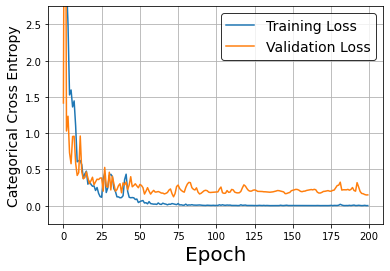

In [24]:
def plot_loss(hist):
    plt.figure()
    plt.plot(hist.history['loss'], label='Training Loss') 
    plt.plot(hist.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch', size=20)
    plt.ylabel('Categorical Cross Entropy', size=14)
    plt.legend(fontsize=14, edgecolor='k')
    plt.grid(True)
    plt.ylim(-0.25,2.75)
    
plot_loss(hist)

In [8]:
y_pred = model.predict(X_test)
y_pred

array([[2.62268266e-04, 9.99351442e-01, 3.86360713e-04],
       [2.20560469e-04, 9.99777377e-01, 1.97318445e-06],
       [6.01573440e-04, 9.99398232e-01, 2.82510285e-07],
       [3.24151728e-07, 1.04904985e-09, 9.99999642e-01],
       [5.41048095e-10, 4.81366835e-10, 1.00000000e+00],
       [2.36555820e-07, 1.33520086e-06, 9.99998450e-01],
       [6.42645887e-07, 9.99998450e-01, 8.98842586e-07],
       [3.46799497e-05, 9.99852419e-01, 1.12896771e-04],
       [1.34864977e-05, 3.14254969e-08, 9.99986529e-01],
       [6.32064879e-01, 3.67412269e-01, 5.22816903e-04],
       [7.69448343e-06, 2.58992717e-04, 9.99733269e-01],
       [1.44753391e-08, 7.76833353e-09, 1.00000000e+00],
       [1.04859845e-08, 6.34994066e-08, 9.99999881e-01],
       [9.98850346e-01, 1.13061257e-03, 1.89959883e-05],
       [1.00000000e+00, 1.08690734e-14, 8.60438960e-20],
       [5.00363084e-09, 9.99999881e-01, 6.04431207e-08],
       [3.95659916e-03, 8.39969575e-01, 1.56073853e-01],
       [9.99924183e-01, 7.57003

Recycle (0) vs. Trash (1) vs. Compost (2)
AlexNet  on New House data

Confusion matrix:
 [[19  1  1]
 [ 0 25  1]
 [ 0  0 23]]

Accuracy: 0.9571428571428572


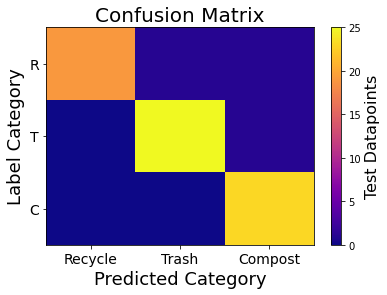

In [16]:
y_test_arg = np.argmax(y_test, axis=1)
y_pred_arg = np.argmax(y_pred, axis=1)
print('Recycle (0) vs. Trash (1) vs. Compost (2)\nAlexNet  on New House data')
print('\nConfusion matrix:\n', confusion_matrix(y_test_arg, y_pred_arg))
print('\nAccuracy:', accuracy(y_test_arg, y_pred_arg))

plt.pcolormesh(confusion_matrix(y_test_arg, y_pred_arg), cmap='plasma')
acc = np.round(accuracy(y_test_arg, y_pred_arg)*100, 2)
plt.title(f'Confusion Matrix', size=20)
plt.xlabel('Predicted Category', size=18)
plt.ylabel('Label Category', size=18)
plt.xticks([0.5, 1.5, 2.5], ['Recycle', 'Trash', 'Compost'], size=14)
plt.yticks([0.5, 1.5, 2.5], ['R', 'T', 'C'], size=14)
plt.ylim(3,0)
plt.colorbar().set_label(label='Test Datapoints', size=16)

Text(0.5, 1.0, 'AlexNet on New House Data\nClassification Test Accuracy: 95.71%\n')

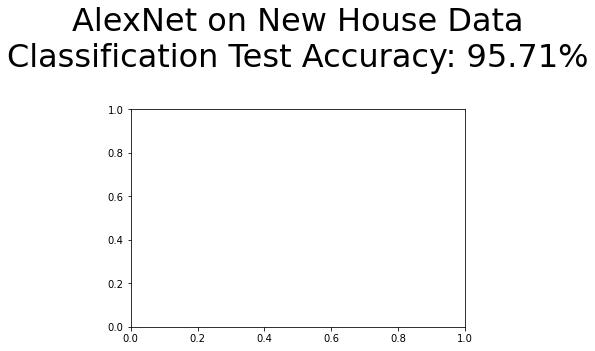

In [14]:
plt.title(f'AlexNet on New House Data\nClassification Test Accuracy: {acc}%\n', size=32)

In [10]:
# np.save(f'X_train_split{SPLIT}', X_train)
# np.save(f'y_train_split{SPLIT}', y_train)
# np.save(f'X_test_split{SPLIT}', X_test)
# np.save(f'y_test_split{SPLIT}', y_test)
# with open(f'test_idx_split{SPLIT}.txt', 'w') as f:
#     f.write(str(list(test_idx)))
# print('split saved')

In [11]:
model_name = f'AlexNet_model_split{SPLIT}_epoch200'
model_json = model.to_json()
with open(f'{model_name}.json', 'w') as jf:
    jf.write(model_json)
model.save_weights(f'{model_name}.h5')

In [12]:
# from tensorflow.keras.models import model_from_json
with open(f'{model_name}.json') as jf:
    json = jf.read()
loaded_model = model_from_json(json)
loaded_model.load_weights(f'{model_name}.h5')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 126, 96)       34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 62, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 58, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 28, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 26, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 24, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 22, 256)       8